# Module 4: Labs Bivariate analysis - 2 qualitative variables


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Read the dataset

In [7]:
lijst = pd.read_csv('../data/MuziekWijn.csv') 
lijst.head()
#als we vermoeden dat musiek invloed heeft op koopgedrag wijn dan musiek onafhankelijke en wijn afhankelijke
# volgorde in crosstab maakt niet uit geeft telkens zelfde x^2

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Give the names of both columns. What is wrong?

In [8]:
lijst.Muziek
lijst.Wijn # zit spatie in de naam

AttributeError: 'DataFrame' object has no attribute 'Wijn'

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [12]:
lijst = lijst.rename(columns={' Wijn': 'Wijn'}) # of 
#lijst.columns = ['Muziek','Wijn']

1. Set up the correct crosstab.

In [16]:
pd.crosstab(lijst.Muziek,lijst.Wijn,margins=True)

Wijn,Andere,Franse,Italiaanse,All
Muziek,,,,
Franse,35,39,1,75
Geen,43,30,11,84
Italiaanse,35,30,19,84
All,113,99,31,243


2. Determine the marginal totals.

In [ ]:
# Zie boven

3. Determine the expected results.

In [17]:
observed = pd.crosstab(lijst.Muziek,lijst.Wijn) # zonder margins
row_sums = observed.sum(axis=1) #som rijen
col_sums = observed.sum()
n = row_sums.sum() # totaal aantal observaties
expected = np.outer(row_sums, col_sums) / n # De verwachte waarden. Als er geen verband is dan verwachten we vrouwen rond 0.8 en mannen rond 3.1
expected

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

4. Calculate the χ² test statistic.

In [18]:
diffs = (expected - observed)**2 / expected #spreiding
print(diffs)

Wijn          Andere    Franse   Italiaanse
Muziek                                     
Franse      0.000437  2.333737     7.672417
Geen        0.397063  0.520924     0.007524
Italiaanse  0.422348  0.520924     6.403837


In [19]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 18.279


5. Calculate Cramér's V. What can you conclude from this?

In [42]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)
print("Het is een association tussen weak en moderate")

0.19393696480652944
Het is een association tussen weak en moderate


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

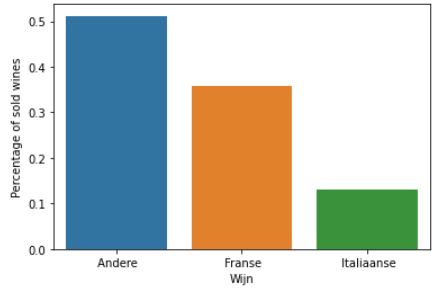

 Andere        0.511905
 Franse        0.357143
 Italiaanse    0.130952
Name: Wijn, dtype: float64


<Axes: >

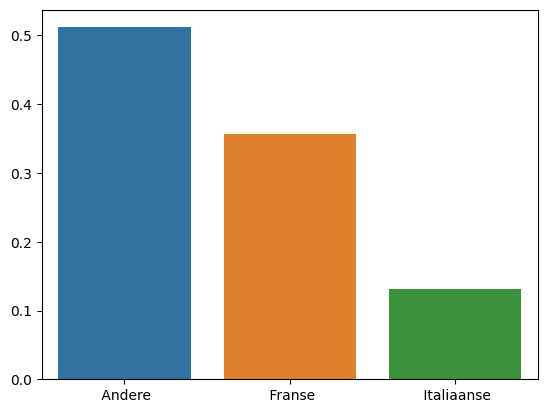

In [35]:
muziek = lijst[lijst.Muziek == "Geen"]
muziek_p = muziek.Wijn.value_counts(normalize=True) # percentages
print(muziek_p)
sns.barplot(x=muziek_p.index,y=muziek_p.values)

Plot a clustered bar chart of the dataset  

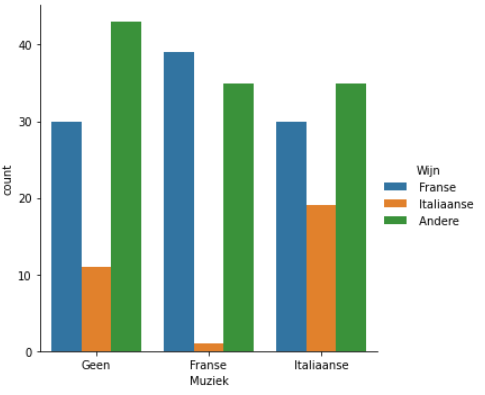

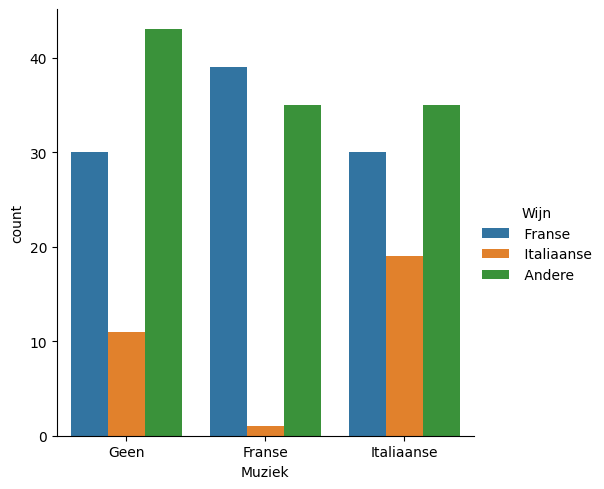

In [36]:
sns.catplot(data=lijst,x="Muziek",hue="Wijn",kind="count")
# in 3 gevallen italiaanse wijn minst verkocht.Italiaanse wijn meer verkocht als itliaanse muziek speelt

Plot a bar chart (stacked bar chart) of the dataset

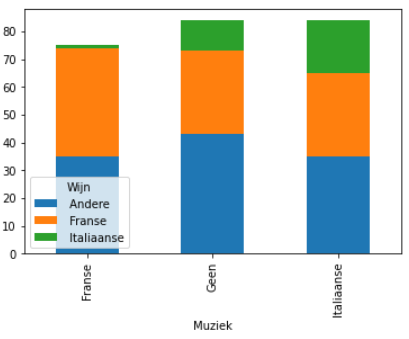

<Axes: xlabel='Muziek'>

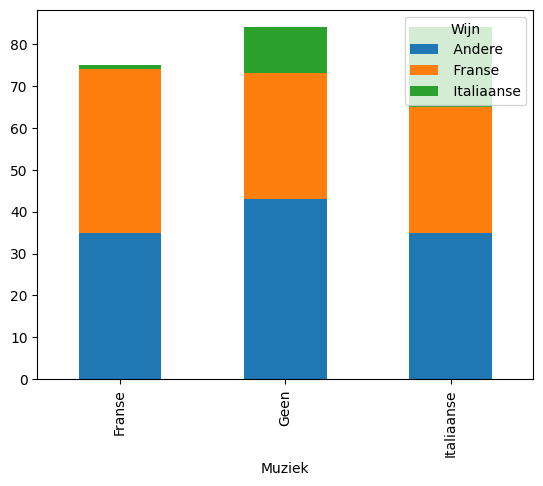

In [38]:
# Vertical oriented stacked bar chart
observed.plot(kind='bar', stacked=True) #barh = bar horizontaal

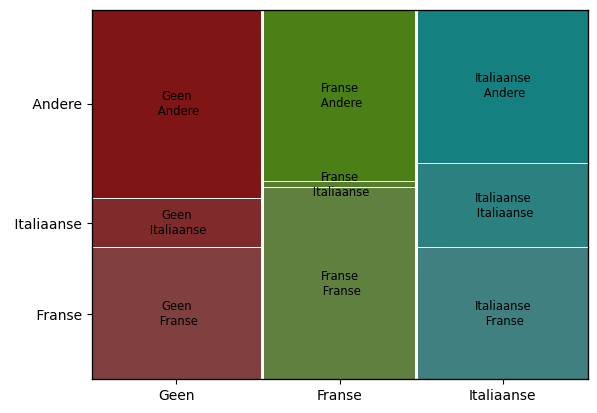

In [40]:
from matplotlib import cm

mos_gender_survey = mosaic(
       data=lijst, index=['Muziek', 'Wijn'],#onafhankelijke variabele,afhankelijke variabele
      )

## Labo 2 - Survey

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [72]:
df = pd.read_csv("../data/survey.csv")
df.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [73]:
print(df.Exer.unique())
typeExer = CategoricalDtype(categories=['None','Some','Freq'], ordered = True)
df.Exer = df.Exer.astype(typeExer)
print(df.Smoke.unique())
typeSmoke = CategoricalDtype(categories=['Never','Occas','Regul','Heavy'], ordered = True)
df.Smoke = df.Smoke.astype(typeSmoke)


['Some' 'None' 'Freq']
['Never' 'Regul' 'Occas' 'Heavy' nan]


* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [74]:
observed = pd.crosstab(df.Exer,df.Smoke,margins=False)
row_sums = observed.sum(axis=1) #som rijen
col_sums = observed.sum()
n = row_sums.sum() # totaal aantal observaties

<Axes: xlabel='Exer', ylabel='count'>

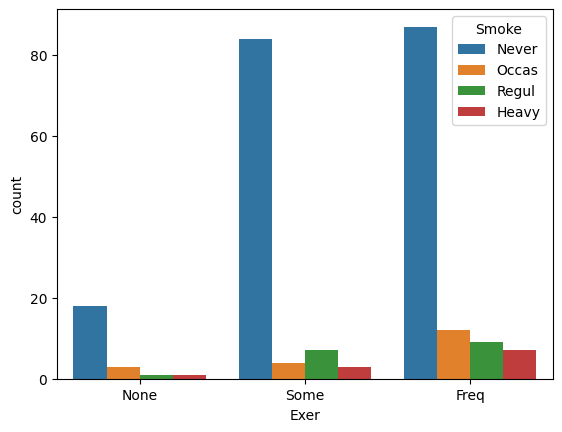

In [75]:
sns.countplot(data=df, x='Exer', hue='Smoke')

In [76]:
expected = np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected #spreiding
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)
chi2, p, df, expected = stats.chi2_contingency(observed)
g = stats.chi2.isf(0.05, df)
print("Critical value     : %.4f" % g)
print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

χ² ≈ 5.489
Critical value     : 12.5916
Chi-squared       : 5.4885
Degrees of freedom: 6
P-value           : 0.4828


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [ ]:
freq2 = pd.crosstab(df.Sex,df.Smoke)
sns.countplot(data=df, x='Sex', hue='Smoke')

Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

## Labo 3 - Digimeter

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).  


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


Read the dataset `leeftijden-bestat-vl.csv`

1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

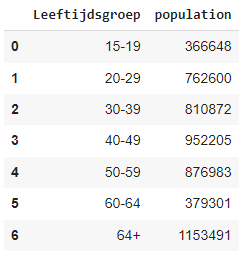

2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
Answer = [142.824 307.288 324.6   352.732 374.372 157.972 502.048]

3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
Answer = [0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]

4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?  

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350